In [22]:
# Custom callback

In [27]:
import tensorflow as tf
import pandas as pd
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.task_type=''
        self.epoch=0
        self.batch=0
        self.df = pd.DataFrame(columns=['epoch', 'batch', 'metrics'])
    def on_train_batch_end(self, batch, logs=None):
        # 新增資料至 df2 DataFrame
        df2 = pd.DataFrame([[self.epoch, batch, logs["loss"]]], columns=['epoch', 'batch', 'metrics'])
        self.df = self.df.append(df2, ignore_index=True)

    def on_train_begin(self, logs=None):
        self.task_type='訓練'
        print("訓練開始...")

    def on_train_end(self, logs=None):
        global df
        df = self.df
        print("訓練結束.")

    # def on_epoch_begin(self, epoch, logs=None):
    #     self.epoch=epoch
    #     print(f"{self.task_type}第 {epoch} 執行週期開始...")

    # def on_epoch_end(self, epoch, logs=None):
    #     print(f"{self.task_type}第 {epoch} 執行週期結束.")

    # def on_test_begin(self, logs=None):
    #     self.task_type='測試'
    #     print("測試開始...")

    # def on_test_end(self, logs=None):
    #     print("測試結束.")

    # def on_predict_begin(self, logs=None):
    #     self.task_type='預測'
    #     print("預測開始...")

    # def on_predict_end(self, logs=None):
    #     print("預測結束.")

    # def on_train_batch_begin(self, batch, logs=None):
    #     print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    # def on_train_batch_end(self, batch, logs=None):
    #     print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")

    # def on_test_batch_begin(self, batch, logs=None):
    #     print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    # def on_test_batch_end(self, batch, logs=None):
    #     print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")

    # def on_predict_batch_begin(self, batch, logs=None):
    #     print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    # def on_predict_batch_end(self, batch, logs=None):
    #     print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")

In [28]:

mnist = tf.keras.datasets.mnist

# 匯入 MNIST 手寫阿拉伯數字 訓練灰階圖片
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
x_train, x_test = x_train / 255.0, x_test / 255.0
input_shape=(28,28,1) # 等於(28,28)

# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_callback = CustomCallback()

# 模型訓練
model.fit(x_train, y_train, epochs=5, callbacks=model_callback)


訓練開始...
Epoch 1/5
   7/1875 [..............................] - ETA: 31s - loss: 2.2174 - accuracy: 0.2054

2022-05-12 01:00:53.210293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/

  22/1875 [..............................] - ETA: 29s - loss: 1.8082 - accuracy: 0.4730

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  34/1875 [..............................] - ETA: 27s - loss: 1.5725 - accuracy: 0.5441

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  50/1875 [..............................] - ETA: 27s - loss: 1.3582 - accuracy: 0.6106

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  62/1875 [..............................] - ETA: 26s - loss: 1.2294 - accuracy: 0.6537

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  77/1875 [>.............................] - ETA: 26s - loss: 1.1162 - accuracy: 0.6838

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  93/1875 [>.............................] - ETA: 26s - loss: 1.0163 - accuracy: 0.7080

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 109/1875 [>.............................] - ETA: 25s - loss: 0.9491 - accuracy: 0.7259

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 121/1875 [>.............................] - ETA: 25s - loss: 0.9048 - accuracy: 0.7376

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 137/1875 [=>............................] - ETA: 25s - loss: 0.8534 - accuracy: 0.7534

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 153/1875 [=>............................] - ETA: 25s - loss: 0.8111 - accuracy: 0.7651

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 169/1875 [=>............................] - ETA: 24s - loss: 0.7742 - accuracy: 0.7748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 181/1875 [=>............................] - ETA: 24s - loss: 0.7512 - accuracy: 0.7795

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 197/1875 [==>...........................] - ETA: 24s - loss: 0.7215 - accuracy: 0.7884

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 213/1875 [==>...........................] - ETA: 23s - loss: 0.6972 - accuracy: 0.7950

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 225/1875 [==>...........................] - ETA: 23s - loss: 0.6802 - accuracy: 0.7997

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 241/1875 [==>...........................] - ETA: 23s - loss: 0.6638 - accuracy: 0.8051

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 257/1875 [===>..........................] - ETA: 23s - loss: 0.6475 - accuracy: 0.8106

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 273/1875 [===>..........................] - ETA: 23s - loss: 0.6313 - accuracy: 0.8156

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 285/1875 [===>..........................] - ETA: 22s - loss: 0.6212 - accuracy: 0.8183

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 301/1875 [===>..........................] - ETA: 22s - loss: 0.6038 - accuracy: 0.8241

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 317/1875 [====>.........................] - ETA: 22s - loss: 0.5887 - accuracy: 0.8278

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 329/1875 [====>.........................] - ETA: 22s - loss: 0.5788 - accuracy: 0.8310

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 345/1875 [====>.........................] - ETA: 21s - loss: 0.5697 - accuracy: 0.8336

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 361/1875 [====>.........................] - ETA: 21s - loss: 0.5570 - accuracy: 0.8373

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 377/1875 [=====>........................] - ETA: 21s - loss: 0.5475 - accuracy: 0.8399

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 389/1875 [=====>........................] - ETA: 21s - loss: 0.5424 - accuracy: 0.8417

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 405/1875 [=====>........................] - ETA: 21s - loss: 0.5343 - accuracy: 0.8437

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 421/1875 [=====>........................] - ETA: 20s - loss: 0.5237 - accuracy: 0.8473

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 433/1875 [=====>........................] - ETA: 20s - loss: 0.5191 - accuracy: 0.8485

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 449/1875 [======>.......................] - ETA: 20s - loss: 0.5114 - accuracy: 0.8509

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 462/1875 [======>.......................] - ETA: 20s - loss: 0.5071 - accuracy: 0.8526

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 474/1875 [======>.......................] - ETA: 20s - loss: 0.5012 - accuracy: 0.8544

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 490/1875 [======>.......................] - ETA: 20s - loss: 0.4944 - accuracy: 0.8566

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 502/1875 [=======>......................] - ETA: 19s - loss: 0.4890 - accuracy: 0.8583

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 518/1875 [=======>......................] - ETA: 19s - loss: 0.4811 - accuracy: 0.8606

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 534/1875 [=======>......................] - ETA: 19s - loss: 0.4752 - accuracy: 0.8623

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 546/1875 [=======>......................] - ETA: 19s - loss: 0.4702 - accuracy: 0.8635

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 562/1875 [=======>......................] - ETA: 19s - loss: 0.4646 - accuracy: 0.8651

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 574/1875 [========>.....................] - ETA: 18s - loss: 0.4606 - accuracy: 0.8662

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 590/1875 [========>.....................] - ETA: 18s - loss: 0.4548 - accuracy: 0.8683

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 606/1875 [========>.....................] - ETA: 18s - loss: 0.4492 - accuracy: 0.8700

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 618/1875 [========>.....................] - ETA: 18s - loss: 0.4453 - accuracy: 0.8711

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 634/1875 [=========>....................] - ETA: 17s - loss: 0.4416 - accuracy: 0.8720

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 646/1875 [=========>....................] - ETA: 17s - loss: 0.4390 - accuracy: 0.8729

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 662/1875 [=========>....................] - ETA: 17s - loss: 0.4363 - accuracy: 0.8732

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 678/1875 [=========>....................] - ETA: 17s - loss: 0.4329 - accuracy: 0.8741

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 689/1875 [==========>...................] - ETA: 17s - loss: 0.4302 - accuracy: 0.8750

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 705/1875 [==========>...................] - ETA: 16s - loss: 0.4272 - accuracy: 0.8760

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 721/1875 [==========>...................] - ETA: 16s - loss: 0.4247 - accuracy: 0.8767

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 732/1875 [==========>...................] - ETA: 16s - loss: 0.4213 - accuracy: 0.8778

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 748/1875 [==========>...................] - ETA: 16s - loss: 0.4174 - accuracy: 0.8789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 760/1875 [===========>..................] - ETA: 16s - loss: 0.4146 - accuracy: 0.8799

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 776/1875 [===========>..................] - ETA: 15s - loss: 0.4111 - accuracy: 0.8808

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 792/1875 [===========>..................] - ETA: 15s - loss: 0.4070 - accuracy: 0.8818

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 804/1875 [===========>..................] - ETA: 15s - loss: 0.4038 - accuracy: 0.8827

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 820/1875 [============>.................] - ETA: 15s - loss: 0.4021 - accuracy: 0.8832

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 836/1875 [============>.................] - ETA: 15s - loss: 0.3987 - accuracy: 0.8843

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 848/1875 [============>.................] - ETA: 14s - loss: 0.3967 - accuracy: 0.8847

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 864/1875 [============>.................] - ETA: 14s - loss: 0.3940 - accuracy: 0.8854

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 880/1875 [=============>................] - ETA: 14s - loss: 0.3918 - accuracy: 0.8859

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 892/1875 [=============>................] - ETA: 14s - loss: 0.3906 - accuracy: 0.8864

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 908/1875 [=============>................] - ETA: 14s - loss: 0.3872 - accuracy: 0.8872

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 920/1875 [=============>................] - ETA: 13s - loss: 0.3855 - accuracy: 0.8878

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 933/1875 [=============>................] - ETA: 13s - loss: 0.3846 - accuracy: 0.8882

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 945/1875 [==============>...............] - ETA: 13s - loss: 0.3832 - accuracy: 0.8887

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 960/1875 [==============>...............] - ETA: 13s - loss: 0.3808 - accuracy: 0.8896

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 972/1875 [==============>...............] - ETA: 13s - loss: 0.3789 - accuracy: 0.8899

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 988/1875 [==============>...............] - ETA: 12s - loss: 0.3758 - accuracy: 0.8910

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 999/1875 [==============>...............] - ETA: 12s - loss: 0.3744 - accuracy: 0.8917

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1015/1875 [===============>..............] - ETA: 12s - loss: 0.3717 - accuracy: 0.8924

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1027/1875 [===============>..............] - ETA: 12s - loss: 0.3696 - accuracy: 0.8930

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1043/1875 [===============>..............] - ETA: 12s - loss: 0.3676 - accuracy: 0.8935

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1059/1875 [===============>..............] - ETA: 11s - loss: 0.3652 - accuracy: 0.8944

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1071/1875 [================>.............] - ETA: 11s - loss: 0.3633 - accuracy: 0.8949

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1087/1875 [================>.............] - ETA: 11s - loss: 0.3607 - accuracy: 0.8956

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1098/1875 [================>.............] - ETA: 11s - loss: 0.3594 - accuracy: 0.8959

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1114/1875 [================>.............] - ETA: 11s - loss: 0.3579 - accuracy: 0.8966

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1126/1875 [=================>............] - ETA: 10s - loss: 0.3569 - accuracy: 0.8970

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1142/1875 [=================>............] - ETA: 10s - loss: 0.3553 - accuracy: 0.8977

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1158/1875 [=================>............] - ETA: 10s - loss: 0.3530 - accuracy: 0.8982

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1170/1875 [=================>............] - ETA: 10s - loss: 0.3513 - accuracy: 0.8986

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1186/1875 [=================>............] - ETA: 10s - loss: 0.3498 - accuracy: 0.8991

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1198/1875 [==================>...........] - ETA: 9s - loss: 0.3485 - accuracy: 0.8995

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1214/1875 [==================>...........] - ETA: 9s - loss: 0.3474 - accuracy: 0.8996

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1230/1875 [==================>...........] - ETA: 9s - loss: 0.3463 - accuracy: 0.9000

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1242/1875 [==================>...........] - ETA: 9s - loss: 0.3442 - accuracy: 0.9006

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1258/1875 [===================>..........] - ETA: 9s - loss: 0.3428 - accuracy: 0.9009

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1270/1875 [===================>..........] - ETA: 8s - loss: 0.3415 - accuracy: 0.9012

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1286/1875 [===================>..........] - ETA: 8s - loss: 0.3390 - accuracy: 0.9019

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1302/1875 [===================>..........] - ETA: 8s - loss: 0.3373 - accuracy: 0.9024

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1314/1875 [====================>.........] - ETA: 8s - loss: 0.3363 - accuracy: 0.9027

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1330/1875 [====================>.........] - ETA: 7s - loss: 0.3350 - accuracy: 0.9031

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1342/1875 [====================>.........] - ETA: 7s - loss: 0.3345 - accuracy: 0.9034

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1358/1875 [====================>.........] - ETA: 7s - loss: 0.3327 - accuracy: 0.9039

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1370/1875 [====================>.........] - ETA: 7s - loss: 0.3310 - accuracy: 0.9044

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1386/1875 [=====================>........] - ETA: 7s - loss: 0.3294 - accuracy: 0.9048

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1398/1875 [=====================>........] - ETA: 6s - loss: 0.3284 - accuracy: 0.9052

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1414/1875 [=====================>........] - ETA: 6s - loss: 0.3265 - accuracy: 0.9057

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1426/1875 [=====================>........] - ETA: 6s - loss: 0.3252 - accuracy: 0.9061

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1442/1875 [======================>.......] - ETA: 6s - loss: 0.3235 - accuracy: 0.9066

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1454/1875 [======================>.......] - ETA: 6s - loss: 0.3220 - accuracy: 0.9070

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1470/1875 [======================>.......] - ETA: 5s - loss: 0.3201 - accuracy: 0.9075

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1482/1875 [======================>.......] - ETA: 5s - loss: 0.3187 - accuracy: 0.9079

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1498/1875 [======================>.......] - ETA: 5s - loss: 0.3174 - accuracy: 0.9083

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1509/1875 [=======================>......] - ETA: 5s - loss: 0.3171 - accuracy: 0.9083

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1525/1875 [=======================>......] - ETA: 5s - loss: 0.3151 - accuracy: 0.9089

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1541/1875 [=======================>......] - ETA: 4s - loss: 0.3140 - accuracy: 0.9091

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1553/1875 [=======================>......] - ETA: 4s - loss: 0.3130 - accuracy: 0.9093

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1569/1875 [========================>.....] - ETA: 4s - loss: 0.3113 - accuracy: 0.9099

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1580/1875 [========================>.....] - ETA: 4s - loss: 0.3101 - accuracy: 0.9103

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1595/1875 [========================>.....] - ETA: 4s - loss: 0.3092 - accuracy: 0.9105

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1611/1875 [========================>.....] - ETA: 3s - loss: 0.3075 - accuracy: 0.9110

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1623/1875 [========================>.....] - ETA: 3s - loss: 0.3067 - accuracy: 0.9113

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1639/1875 [=========================>....] - ETA: 3s - loss: 0.3056 - accuracy: 0.9116

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1651/1875 [=========================>....] - ETA: 3s - loss: 0.3046 - accuracy: 0.9119

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1667/1875 [=========================>....] - ETA: 3s - loss: 0.3032 - accuracy: 0.9122

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1679/1875 [=========================>....] - ETA: 2s - loss: 0.3022 - accuracy: 0.9125

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1694/1875 [==========================>...] - ETA: 2s - loss: 0.3015 - accuracy: 0.9126

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1706/1875 [==========================>...] - ETA: 2s - loss: 0.3008 - accuracy: 0.9129

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1722/1875 [==========================>...] - ETA: 2s - loss: 0.2995 - accuracy: 0.9133

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1734/1875 [==========================>...] - ETA: 2s - loss: 0.2983 - accuracy: 0.9137

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1749/1875 [==========================>...] - ETA: 1s - loss: 0.2976 - accuracy: 0.9138

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1764/1875 [===========================>..] - ETA: 1s - loss: 0.2972 - accuracy: 0.9140

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1776/1875 [===========================>..] - ETA: 1s - loss: 0.2964 - accuracy: 0.9143

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1792/1875 [===========================>..] - ETA: 1s - loss: 0.2952 - accuracy: 0.9146

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2939 - accuracy: 0.9150

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1819/1875 [============================>.] - ETA: 0s - loss: 0.2929 - accuracy: 0.9153

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1835/1875 [============================>.] - ETA: 0s - loss: 0.2919 - accuracy: 0.9156

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1845/1875 [============================>.] - ETA: 0s - loss: 0.2908 - accuracy: 0.9159

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1857/1875 [============================>.] - ETA: 0s - loss: 0.2900 - accuracy: 0.9162

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1873/1875 [============================>.] - ETA: 0s - loss: 0.2893 - accuracy: 0.9163

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1875/1875 [==============================] - 28s 15ms/step - loss: 0.2891 - accuracy: 0.9164
Epoch 2/5
   9/1875 [..............................] - ETA: 29s - loss: 0.1600 - accuracy: 0.9583

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  25/1875 [..............................] - ETA: 27s - loss: 0.1554 - accuracy: 0.9537

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  37/1875 [..............................] - ETA: 27s - loss: 0.1455 - accuracy: 0.9544

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  53/1875 [..............................] - ETA: 27s - loss: 0.1594 - accuracy: 0.9505

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  68/1875 [>.............................] - ETA: 27s - loss: 0.1574 - accuracy: 0.9522

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  83/1875 [>.............................] - ETA: 27s - loss: 0.1514 - accuracy: 0.9556

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  95/1875 [>.............................] - ETA: 27s - loss: 0.1570 - accuracy: 0.9546

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 110/1875 [>.............................] - ETA: 26s - loss: 0.1585 - accuracy: 0.9548

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 124/1875 [>.............................] - ETA: 26s - loss: 0.1628 - accuracy: 0.9539

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 135/1875 [=>............................] - ETA: 26s - loss: 0.1639 - accuracy: 0.9542

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 150/1875 [=>............................] - ETA: 26s - loss: 0.1609 - accuracy: 0.9550

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 165/1875 [=>............................] - ETA: 26s - loss: 0.1594 - accuracy: 0.9559

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 179/1875 [=>............................] - ETA: 26s - loss: 0.1576 - accuracy: 0.9558

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 191/1875 [==>...........................] - ETA: 25s - loss: 0.1571 - accuracy: 0.9558

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 206/1875 [==>...........................] - ETA: 25s - loss: 0.1553 - accuracy: 0.9569

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 221/1875 [==>...........................] - ETA: 25s - loss: 0.1545 - accuracy: 0.9569

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 233/1875 [==>...........................] - ETA: 25s - loss: 0.1560 - accuracy: 0.9557

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 248/1875 [==>...........................] - ETA: 25s - loss: 0.1567 - accuracy: 0.9553

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 259/1875 [===>..........................] - ETA: 25s - loss: 0.1555 - accuracy: 0.9556

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 274/1875 [===>..........................] - ETA: 24s - loss: 0.1565 - accuracy: 0.9549

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 290/1875 [===>..........................] - ETA: 24s - loss: 0.1577 - accuracy: 0.9540

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 302/1875 [===>..........................] - ETA: 24s - loss: 0.1568 - accuracy: 0.9543

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 318/1875 [====>.........................] - ETA: 24s - loss: 0.1576 - accuracy: 0.9542

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 329/1875 [====>.........................] - ETA: 23s - loss: 0.1568 - accuracy: 0.9543

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 344/1875 [====>.........................] - ETA: 23s - loss: 0.1573 - accuracy: 0.9539

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 359/1875 [====>.........................] - ETA: 23s - loss: 0.1576 - accuracy: 0.9540

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 371/1875 [====>.........................] - ETA: 23s - loss: 0.1562 - accuracy: 0.9544

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 386/1875 [=====>........................] - ETA: 22s - loss: 0.1574 - accuracy: 0.9537

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 398/1875 [=====>........................] - ETA: 22s - loss: 0.1572 - accuracy: 0.9541

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 413/1875 [=====>........................] - ETA: 22s - loss: 0.1561 - accuracy: 0.9546

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 425/1875 [=====>........................] - ETA: 22s - loss: 0.1550 - accuracy: 0.9549

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 441/1875 [======>.......................] - ETA: 22s - loss: 0.1547 - accuracy: 0.9549

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 452/1875 [======>.......................] - ETA: 21s - loss: 0.1544 - accuracy: 0.9552

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 468/1875 [======>.......................] - ETA: 21s - loss: 0.1537 - accuracy: 0.9558

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 480/1875 [======>.......................] - ETA: 21s - loss: 0.1533 - accuracy: 0.9555

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 495/1875 [======>.......................] - ETA: 21s - loss: 0.1532 - accuracy: 0.9556

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 510/1875 [=======>......................] - ETA: 21s - loss: 0.1531 - accuracy: 0.9556

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 522/1875 [=======>......................] - ETA: 20s - loss: 0.1522 - accuracy: 0.9559

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 534/1875 [=======>......................] - ETA: 20s - loss: 0.1517 - accuracy: 0.9560

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 550/1875 [=======>......................] - ETA: 20s - loss: 0.1509 - accuracy: 0.9563

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 565/1875 [========>.....................] - ETA: 20s - loss: 0.1495 - accuracy: 0.9567

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 576/1875 [========>.....................] - ETA: 20s - loss: 0.1499 - accuracy: 0.9564

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 586/1875 [========>.....................] - ETA: 20s - loss: 0.1499 - accuracy: 0.9565

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 601/1875 [========>.....................] - ETA: 19s - loss: 0.1499 - accuracy: 0.9565

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 613/1875 [========>.....................] - ETA: 19s - loss: 0.1497 - accuracy: 0.9565

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 628/1875 [=========>....................] - ETA: 19s - loss: 0.1494 - accuracy: 0.9565

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 640/1875 [=========>....................] - ETA: 19s - loss: 0.1487 - accuracy: 0.9567

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 655/1875 [=========>....................] - ETA: 18s - loss: 0.1486 - accuracy: 0.9569

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 667/1875 [=========>....................] - ETA: 18s - loss: 0.1488 - accuracy: 0.9569

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 682/1875 [=========>....................] - ETA: 18s - loss: 0.1481 - accuracy: 0.9572

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 694/1875 [==========>...................] - ETA: 18s - loss: 0.1485 - accuracy: 0.9569

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 709/1875 [==========>...................] - ETA: 18s - loss: 0.1482 - accuracy: 0.9569

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 721/1875 [==========>...................] - ETA: 17s - loss: 0.1482 - accuracy: 0.9570

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 736/1875 [==========>...................] - ETA: 17s - loss: 0.1478 - accuracy: 0.9570

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 748/1875 [==========>...................] - ETA: 17s - loss: 0.1472 - accuracy: 0.9572

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 764/1875 [===========>..................] - ETA: 17s - loss: 0.1474 - accuracy: 0.9572

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 775/1875 [===========>..................] - ETA: 17s - loss: 0.1471 - accuracy: 0.9572

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 791/1875 [===========>..................] - ETA: 16s - loss: 0.1468 - accuracy: 0.9571

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 803/1875 [===========>..................] - ETA: 16s - loss: 0.1463 - accuracy: 0.9572

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 819/1875 [============>.................] - ETA: 16s - loss: 0.1461 - accuracy: 0.9573

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 833/1875 [============>.................] - ETA: 16s - loss: 0.1454 - accuracy: 0.9575

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 844/1875 [============>.................] - ETA: 16s - loss: 0.1455 - accuracy: 0.9576

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 859/1875 [============>.................] - ETA: 15s - loss: 0.1453 - accuracy: 0.9576

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 868/1875 [============>.................] - ETA: 15s - loss: 0.1451 - accuracy: 0.9576

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 882/1875 [=============>................] - ETA: 15s - loss: 0.1457 - accuracy: 0.9576

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 894/1875 [=============>................] - ETA: 15s - loss: 0.1459 - accuracy: 0.9574

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 909/1875 [=============>................] - ETA: 15s - loss: 0.1457 - accuracy: 0.9576

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 920/1875 [=============>................] - ETA: 14s - loss: 0.1451 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 935/1875 [=============>................] - ETA: 14s - loss: 0.1450 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 946/1875 [==============>...............] - ETA: 14s - loss: 0.1445 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 961/1875 [==============>...............] - ETA: 14s - loss: 0.1442 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 973/1875 [==============>...............] - ETA: 14s - loss: 0.1439 - accuracy: 0.9577

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 985/1875 [==============>...............] - ETA: 13s - loss: 0.1445 - accuracy: 0.9576

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 996/1875 [==============>...............] - ETA: 13s - loss: 0.1441 - accuracy: 0.9576

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1011/1875 [===============>..............] - ETA: 13s - loss: 0.1441 - accuracy: 0.9575

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1022/1875 [===============>..............] - ETA: 13s - loss: 0.1442 - accuracy: 0.9575

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1037/1875 [===============>..............] - ETA: 13s - loss: 0.1445 - accuracy: 0.9573

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1048/1875 [===============>..............] - ETA: 12s - loss: 0.1447 - accuracy: 0.9572

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1059/1875 [===============>..............] - ETA: 12s - loss: 0.1443 - accuracy: 0.9573

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1070/1875 [================>.............] - ETA: 12s - loss: 0.1449 - accuracy: 0.9571

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1082/1875 [================>.............] - ETA: 12s - loss: 0.1448 - accuracy: 0.9571

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1094/1875 [================>.............] - ETA: 12s - loss: 0.1443 - accuracy: 0.9572

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1108/1875 [================>.............] - ETA: 12s - loss: 0.1436 - accuracy: 0.9575

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1120/1875 [================>.............] - ETA: 11s - loss: 0.1436 - accuracy: 0.9575

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1135/1875 [=================>............] - ETA: 11s - loss: 0.1429 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1145/1875 [=================>............] - ETA: 11s - loss: 0.1425 - accuracy: 0.9579

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1158/1875 [=================>............] - ETA: 11s - loss: 0.1428 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1170/1875 [=================>............] - ETA: 11s - loss: 0.1430 - accuracy: 0.9577

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1185/1875 [=================>............] - ETA: 10s - loss: 0.1426 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1197/1875 [==================>...........] - ETA: 10s - loss: 0.1425 - accuracy: 0.9579

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1209/1875 [==================>...........] - ETA: 10s - loss: 0.1429 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1222/1875 [==================>...........] - ETA: 10s - loss: 0.1429 - accuracy: 0.9579

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1234/1875 [==================>...........] - ETA: 10s - loss: 0.1429 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1249/1875 [==================>...........] - ETA: 9s - loss: 0.1427 - accuracy: 0.9579 

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1260/1875 [===================>..........] - ETA: 9s - loss: 0.1432 - accuracy: 0.9578

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1273/1875 [===================>..........] - ETA: 9s - loss: 0.1431 - accuracy: 0.9579

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1285/1875 [===================>..........] - ETA: 9s - loss: 0.1430 - accuracy: 0.9579

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1299/1875 [===================>..........] - ETA: 9s - loss: 0.1429 - accuracy: 0.9580

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1313/1875 [====================>.........] - ETA: 8s - loss: 0.1423 - accuracy: 0.9582

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1326/1875 [====================>.........] - ETA: 8s - loss: 0.1423 - accuracy: 0.9582

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1338/1875 [====================>.........] - ETA: 8s - loss: 0.1419 - accuracy: 0.9583

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1350/1875 [====================>.........] - ETA: 8s - loss: 0.1418 - accuracy: 0.9583

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1361/1875 [====================>.........] - ETA: 8s - loss: 0.1418 - accuracy: 0.9583

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1376/1875 [=====================>........] - ETA: 7s - loss: 0.1422 - accuracy: 0.9582

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1388/1875 [=====================>........] - ETA: 7s - loss: 0.1423 - accuracy: 0.9581

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1398/1875 [=====================>........] - ETA: 7s - loss: 0.1419 - accuracy: 0.9582

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1413/1875 [=====================>........] - ETA: 7s - loss: 0.1414 - accuracy: 0.9584

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1428/1875 [=====================>........] - ETA: 7s - loss: 0.1410 - accuracy: 0.9586

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1438/1875 [======================>.......] - ETA: 6s - loss: 0.1408 - accuracy: 0.9585

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1453/1875 [======================>.......] - ETA: 6s - loss: 0.1405 - accuracy: 0.9586

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1463/1875 [======================>.......] - ETA: 6s - loss: 0.1406 - accuracy: 0.9586

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1479/1875 [======================>.......] - ETA: 6s - loss: 0.1402 - accuracy: 0.9587

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1490/1875 [======================>.......] - ETA: 6s - loss: 0.1404 - accuracy: 0.9587

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1501/1875 [=======================>......] - ETA: 5s - loss: 0.1407 - accuracy: 0.9586

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1513/1875 [=======================>......] - ETA: 5s - loss: 0.1407 - accuracy: 0.9585

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1523/1875 [=======================>......] - ETA: 5s - loss: 0.1408 - accuracy: 0.9584

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1539/1875 [=======================>......] - ETA: 5s - loss: 0.1412 - accuracy: 0.9583

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1548/1875 [=======================>......] - ETA: 5s - loss: 0.1410 - accuracy: 0.9584

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1563/1875 [========================>.....] - ETA: 5s - loss: 0.1407 - accuracy: 0.9584

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1572/1875 [========================>.....] - ETA: 4s - loss: 0.1407 - accuracy: 0.9585

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1588/1875 [========================>.....] - ETA: 4s - loss: 0.1402 - accuracy: 0.9586

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1604/1875 [========================>.....] - ETA: 4s - loss: 0.1399 - accuracy: 0.9586

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1616/1875 [========================>.....] - ETA: 4s - loss: 0.1396 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1630/1875 [=========================>....] - ETA: 3s - loss: 0.1392 - accuracy: 0.9589

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1646/1875 [=========================>....] - ETA: 3s - loss: 0.1391 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1655/1875 [=========================>....] - ETA: 3s - loss: 0.1391 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1671/1875 [=========================>....] - ETA: 3s - loss: 0.1388 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1687/1875 [=========================>....] - ETA: 3s - loss: 0.1385 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1699/1875 [==========================>...] - ETA: 2s - loss: 0.1385 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1712/1875 [==========================>...] - ETA: 2s - loss: 0.1385 - accuracy: 0.9587

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1728/1875 [==========================>...] - ETA: 2s - loss: 0.1381 - accuracy: 0.9587

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1738/1875 [==========================>...] - ETA: 2s - loss: 0.1379 - accuracy: 0.9587

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1754/1875 [===========================>..] - ETA: 1s - loss: 0.1376 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1764/1875 [===========================>..] - ETA: 1s - loss: 0.1378 - accuracy: 0.9588

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1780/1875 [===========================>..] - ETA: 1s - loss: 0.1374 - accuracy: 0.9590

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1790/1875 [===========================>..] - ETA: 1s - loss: 0.1373 - accuracy: 0.9590

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1806/1875 [===========================>..] - ETA: 1s - loss: 0.1372 - accuracy: 0.9590

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1815/1875 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9591

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1827/1875 [============================>.] - ETA: 0s - loss: 0.1370 - accuracy: 0.9591

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1837/1875 [============================>.] - ETA: 0s - loss: 0.1374 - accuracy: 0.9590

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1853/1875 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9591

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1865/1875 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9591

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1875/1875 [==============================] - 30s 16ms/step - loss: 0.1369 - accuracy: 0.9592
Epoch 3/5
   1/1875 [..............................] - ETA: 30s - loss: 0.0654 - accuracy: 0.9688

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  13/1875 [..............................] - ETA: 36s - loss: 0.0825 - accuracy: 0.9832

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  29/1875 [..............................] - ETA: 30s - loss: 0.0800 - accuracy: 0.9774

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  39/1875 [..............................] - ETA: 30s - loss: 0.0890 - accuracy: 0.9752

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  53/1875 [..............................] - ETA: 30s - loss: 0.0987 - accuracy: 0.9723

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  63/1875 [>.............................] - ETA: 30s - loss: 0.0999 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  78/1875 [>.............................] - ETA: 30s - loss: 0.1005 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  87/1875 [>.............................] - ETA: 30s - loss: 0.1001 - accuracy: 0.9713

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 103/1875 [>.............................] - ETA: 29s - loss: 0.0977 - accuracy: 0.9715

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 114/1875 [>.............................] - ETA: 29s - loss: 0.1009 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 128/1875 [=>............................] - ETA: 29s - loss: 0.1016 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 140/1875 [=>............................] - ETA: 28s - loss: 0.1044 - accuracy: 0.9692

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 156/1875 [=>............................] - ETA: 28s - loss: 0.1055 - accuracy: 0.9681

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 172/1875 [=>............................] - ETA: 27s - loss: 0.1042 - accuracy: 0.9686

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 180/1875 [=>............................] - ETA: 27s - loss: 0.1025 - accuracy: 0.9694

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 196/1875 [==>...........................] - ETA: 27s - loss: 0.1044 - accuracy: 0.9689

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 210/1875 [==>...........................] - ETA: 27s - loss: 0.1019 - accuracy: 0.9692

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 220/1875 [==>...........................] - ETA: 27s - loss: 0.1022 - accuracy: 0.9695

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 235/1875 [==>...........................] - ETA: 26s - loss: 0.1006 - accuracy: 0.9702

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 247/1875 [==>...........................] - ETA: 26s - loss: 0.1005 - accuracy: 0.9700

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 263/1875 [===>..........................] - ETA: 26s - loss: 0.1014 - accuracy: 0.9703

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 273/1875 [===>..........................] - ETA: 26s - loss: 0.1008 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 288/1875 [===>..........................] - ETA: 25s - loss: 0.1006 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 297/1875 [===>..........................] - ETA: 25s - loss: 0.1018 - accuracy: 0.9702

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 313/1875 [====>.........................] - ETA: 25s - loss: 0.1016 - accuracy: 0.9702

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 325/1875 [====>.........................] - ETA: 25s - loss: 0.1013 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 338/1875 [====>.........................] - ETA: 25s - loss: 0.1012 - accuracy: 0.9702

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 351/1875 [====>.........................] - ETA: 24s - loss: 0.1012 - accuracy: 0.9701

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 362/1875 [====>.........................] - ETA: 24s - loss: 0.1016 - accuracy: 0.9696

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 376/1875 [=====>........................] - ETA: 24s - loss: 0.1007 - accuracy: 0.9699

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 387/1875 [=====>........................] - ETA: 24s - loss: 0.1003 - accuracy: 0.9700

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 398/1875 [=====>........................] - ETA: 24s - loss: 0.0995 - accuracy: 0.9701

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 409/1875 [=====>........................] - ETA: 24s - loss: 0.0985 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 425/1875 [=====>........................] - ETA: 23s - loss: 0.0976 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 436/1875 [=====>........................] - ETA: 23s - loss: 0.0975 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 449/1875 [======>.......................] - ETA: 23s - loss: 0.0973 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 460/1875 [======>.......................] - ETA: 23s - loss: 0.0983 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 474/1875 [======>.......................] - ETA: 23s - loss: 0.0987 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 484/1875 [======>.......................] - ETA: 23s - loss: 0.0984 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 500/1875 [=======>......................] - ETA: 22s - loss: 0.0985 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 512/1875 [=======>......................] - ETA: 22s - loss: 0.0985 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 526/1875 [=======>......................] - ETA: 22s - loss: 0.0982 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 539/1875 [=======>......................] - ETA: 22s - loss: 0.0979 - accuracy: 0.9712

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 549/1875 [=======>......................] - ETA: 21s - loss: 0.0975 - accuracy: 0.9713

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 564/1875 [========>.....................] - ETA: 21s - loss: 0.0980 - accuracy: 0.9712

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 576/1875 [========>.....................] - ETA: 21s - loss: 0.0979 - accuracy: 0.9714

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 590/1875 [========>.....................] - ETA: 21s - loss: 0.0986 - accuracy: 0.9711

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 601/1875 [========>.....................] - ETA: 20s - loss: 0.0987 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 616/1875 [========>.....................] - ETA: 20s - loss: 0.0981 - accuracy: 0.9711

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 627/1875 [=========>....................] - ETA: 20s - loss: 0.0981 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 642/1875 [=========>....................] - ETA: 20s - loss: 0.0980 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 657/1875 [=========>....................] - ETA: 19s - loss: 0.0978 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 667/1875 [=========>....................] - ETA: 19s - loss: 0.0978 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 683/1875 [=========>....................] - ETA: 19s - loss: 0.0981 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 693/1875 [==========>...................] - ETA: 19s - loss: 0.0980 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 709/1875 [==========>...................] - ETA: 19s - loss: 0.0976 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 721/1875 [==========>...................] - ETA: 18s - loss: 0.0977 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 735/1875 [==========>...................] - ETA: 18s - loss: 0.0978 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 748/1875 [==========>...................] - ETA: 18s - loss: 0.0977 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 758/1875 [===========>..................] - ETA: 18s - loss: 0.0980 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 770/1875 [===========>..................] - ETA: 18s - loss: 0.0978 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 783/1875 [===========>..................] - ETA: 17s - loss: 0.0978 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 799/1875 [===========>..................] - ETA: 17s - loss: 0.0983 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 807/1875 [===========>..................] - ETA: 17s - loss: 0.0986 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 823/1875 [============>.................] - ETA: 17s - loss: 0.0985 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 833/1875 [============>.................] - ETA: 17s - loss: 0.0988 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 844/1875 [============>.................] - ETA: 16s - loss: 0.0986 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 858/1875 [============>.................] - ETA: 16s - loss: 0.0988 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 869/1875 [============>.................] - ETA: 16s - loss: 0.0990 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 881/1875 [=============>................] - ETA: 16s - loss: 0.0991 - accuracy: 0.9703

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 892/1875 [=============>................] - ETA: 16s - loss: 0.0988 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 905/1875 [=============>................] - ETA: 16s - loss: 0.0994 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 920/1875 [=============>................] - ETA: 15s - loss: 0.0996 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 929/1875 [=============>................] - ETA: 15s - loss: 0.0993 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 945/1875 [==============>...............] - ETA: 15s - loss: 0.0989 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 954/1875 [==============>...............] - ETA: 15s - loss: 0.0995 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 970/1875 [==============>...............] - ETA: 14s - loss: 0.0993 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 981/1875 [==============>...............] - ETA: 14s - loss: 0.0990 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 992/1875 [==============>...............] - ETA: 14s - loss: 0.0992 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1008/1875 [===============>..............] - ETA: 14s - loss: 0.0993 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1017/1875 [===============>..............] - ETA: 14s - loss: 0.0992 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1031/1875 [===============>..............] - ETA: 13s - loss: 0.0994 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1041/1875 [===============>..............] - ETA: 13s - loss: 0.0995 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1056/1875 [===============>..............] - ETA: 13s - loss: 0.0997 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1069/1875 [================>.............] - ETA: 13s - loss: 0.0997 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1081/1875 [================>.............] - ETA: 13s - loss: 0.1000 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1092/1875 [================>.............] - ETA: 12s - loss: 0.0998 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1108/1875 [================>.............] - ETA: 12s - loss: 0.0998 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1124/1875 [================>.............] - ETA: 12s - loss: 0.0998 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1133/1875 [=================>............] - ETA: 12s - loss: 0.0995 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1149/1875 [=================>............] - ETA: 11s - loss: 0.0999 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1161/1875 [=================>............] - ETA: 11s - loss: 0.1000 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1175/1875 [=================>............] - ETA: 11s - loss: 0.0998 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1190/1875 [==================>...........] - ETA: 11s - loss: 0.0998 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1200/1875 [==================>...........] - ETA: 11s - loss: 0.0998 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1216/1875 [==================>...........] - ETA: 10s - loss: 0.0998 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1227/1875 [==================>...........] - ETA: 10s - loss: 0.1001 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1239/1875 [==================>...........] - ETA: 10s - loss: 0.0999 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1253/1875 [===================>..........] - ETA: 10s - loss: 0.1001 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1269/1875 [===================>..........] - ETA: 9s - loss: 0.0996 - accuracy: 0.9709 

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1279/1875 [===================>..........] - ETA: 9s - loss: 0.0994 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1295/1875 [===================>..........] - ETA: 9s - loss: 0.0995 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1307/1875 [===================>..........] - ETA: 9s - loss: 0.0993 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1319/1875 [====================>.........] - ETA: 9s - loss: 0.0993 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1333/1875 [====================>.........] - ETA: 8s - loss: 0.0993 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1345/1875 [====================>.........] - ETA: 8s - loss: 0.0993 - accuracy: 0.9711

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1359/1875 [====================>.........] - ETA: 8s - loss: 0.0996 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1374/1875 [====================>.........] - ETA: 8s - loss: 0.0995 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1384/1875 [=====================>........] - ETA: 8s - loss: 0.0994 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1400/1875 [=====================>........] - ETA: 7s - loss: 0.0994 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1413/1875 [=====================>........] - ETA: 7s - loss: 0.0997 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1425/1875 [=====================>........] - ETA: 7s - loss: 0.0998 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1439/1875 [======================>.......] - ETA: 7s - loss: 0.1000 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1451/1875 [======================>.......] - ETA: 6s - loss: 0.0998 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1465/1875 [======================>.......] - ETA: 6s - loss: 0.0996 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1481/1875 [======================>.......] - ETA: 6s - loss: 0.0995 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1491/1875 [======================>.......] - ETA: 6s - loss: 0.0994 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1506/1875 [=======================>......] - ETA: 6s - loss: 0.0994 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1517/1875 [=======================>......] - ETA: 5s - loss: 0.0993 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1532/1875 [=======================>......] - ETA: 5s - loss: 0.0997 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1541/1875 [=======================>......] - ETA: 5s - loss: 0.0998 - accuracy: 0.9710

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1557/1875 [=======================>......] - ETA: 5s - loss: 0.0999 - accuracy: 0.9709

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1573/1875 [========================>.....] - ETA: 4s - loss: 0.0999 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1583/1875 [========================>.....] - ETA: 4s - loss: 0.1001 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1599/1875 [========================>.....] - ETA: 4s - loss: 0.1002 - accuracy: 0.9708

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1611/1875 [========================>.....] - ETA: 4s - loss: 0.1008 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1621/1875 [========================>.....] - ETA: 4s - loss: 0.1005 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1637/1875 [=========================>....] - ETA: 3s - loss: 0.1007 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1647/1875 [=========================>....] - ETA: 3s - loss: 0.1005 - accuracy: 0.9707

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1662/1875 [=========================>....] - ETA: 3s - loss: 0.1005 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1677/1875 [=========================>....] - ETA: 3s - loss: 0.1005 - accuracy: 0.9706

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1691/1875 [==========================>...] - ETA: 3s - loss: 0.1008 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1697/1875 [==========================>...] - ETA: 2s - loss: 0.1010 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1712/1875 [==========================>...] - ETA: 2s - loss: 0.1011 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1720/1875 [==========================>...] - ETA: 2s - loss: 0.1010 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1735/1875 [==========================>...] - ETA: 2s - loss: 0.1011 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1744/1875 [==========================>...] - ETA: 2s - loss: 0.1011 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1759/1875 [===========================>..] - ETA: 1s - loss: 0.1011 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1772/1875 [===========================>..] - ETA: 1s - loss: 0.1011 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1786/1875 [===========================>..] - ETA: 1s - loss: 0.1011 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1794/1875 [===========================>..] - ETA: 1s - loss: 0.1011 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1810/1875 [===========================>..] - ETA: 1s - loss: 0.1008 - accuracy: 0.9705

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1821/1875 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1831/1875 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1846/1875 [============================>.] - ETA: 0s - loss: 0.1011 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1856/1875 [============================>.] - ETA: 0s - loss: 0.1013 - accuracy: 0.9703

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1871/1875 [============================>.] - ETA: 0s - loss: 0.1016 - accuracy: 0.9704

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1875/1875 [==============================] - 31s 16ms/step - loss: 0.1015 - accuracy: 0.9704
Epoch 4/5
   9/1875 [..............................] - ETA: 36s - loss: 0.0920 - accuracy: 0.9757

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  25/1875 [..............................] - ETA: 28s - loss: 0.1014 - accuracy: 0.9688

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  34/1875 [..............................] - ETA: 30s - loss: 0.0948 - accuracy: 0.9724

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  50/1875 [..............................] - ETA: 28s - loss: 0.0911 - accuracy: 0.9756

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  64/1875 [>.............................] - ETA: 29s - loss: 0.0949 - accuracy: 0.9731

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  76/1875 [>.............................] - ETA: 28s - loss: 0.0911 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  88/1875 [>.............................] - ETA: 28s - loss: 0.0886 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 104/1875 [>.............................] - ETA: 27s - loss: 0.0886 - accuracy: 0.9739

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 120/1875 [>.............................] - ETA: 26s - loss: 0.0868 - accuracy: 0.9740

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 133/1875 [=>............................] - ETA: 26s - loss: 0.0862 - accuracy: 0.9737

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 148/1875 [=>............................] - ETA: 26s - loss: 0.0842 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 158/1875 [=>............................] - ETA: 26s - loss: 0.0851 - accuracy: 0.9741

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 168/1875 [=>............................] - ETA: 27s - loss: 0.0850 - accuracy: 0.9741

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 184/1875 [=>............................] - ETA: 26s - loss: 0.0846 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 196/1875 [==>...........................] - ETA: 26s - loss: 0.0835 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 208/1875 [==>...........................] - ETA: 26s - loss: 0.0835 - accuracy: 0.9742

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 223/1875 [==>...........................] - ETA: 26s - loss: 0.0836 - accuracy: 0.9738

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 237/1875 [==>...........................] - ETA: 25s - loss: 0.0851 - accuracy: 0.9734

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 247/1875 [==>...........................] - ETA: 25s - loss: 0.0859 - accuracy: 0.9729

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 263/1875 [===>..........................] - ETA: 25s - loss: 0.0850 - accuracy: 0.9730

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 278/1875 [===>..........................] - ETA: 25s - loss: 0.0846 - accuracy: 0.9729

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 293/1875 [===>..........................] - ETA: 24s - loss: 0.0841 - accuracy: 0.9730

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 309/1875 [===>..........................] - ETA: 24s - loss: 0.0859 - accuracy: 0.9732

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 319/1875 [====>.........................] - ETA: 24s - loss: 0.0845 - accuracy: 0.9736

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 334/1875 [====>.........................] - ETA: 23s - loss: 0.0836 - accuracy: 0.9740

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 342/1875 [====>.........................] - ETA: 24s - loss: 0.0831 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 357/1875 [====>.........................] - ETA: 23s - loss: 0.0821 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 366/1875 [====>.........................] - ETA: 23s - loss: 0.0816 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 382/1875 [=====>........................] - ETA: 23s - loss: 0.0820 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 396/1875 [=====>........................] - ETA: 23s - loss: 0.0820 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 408/1875 [=====>........................] - ETA: 23s - loss: 0.0823 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 422/1875 [=====>........................] - ETA: 22s - loss: 0.0817 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 432/1875 [=====>........................] - ETA: 22s - loss: 0.0813 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 443/1875 [======>.......................] - ETA: 22s - loss: 0.0821 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 457/1875 [======>.......................] - ETA: 22s - loss: 0.0821 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 466/1875 [======>.......................] - ETA: 22s - loss: 0.0817 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 482/1875 [======>.......................] - ETA: 22s - loss: 0.0812 - accuracy: 0.9750

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 491/1875 [======>.......................] - ETA: 22s - loss: 0.0811 - accuracy: 0.9751

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 507/1875 [=======>......................] - ETA: 21s - loss: 0.0802 - accuracy: 0.9753

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 521/1875 [=======>......................] - ETA: 21s - loss: 0.0808 - accuracy: 0.9753

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 533/1875 [=======>......................] - ETA: 21s - loss: 0.0813 - accuracy: 0.9753

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 548/1875 [=======>......................] - ETA: 21s - loss: 0.0812 - accuracy: 0.9753

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 563/1875 [========>.....................] - ETA: 20s - loss: 0.0806 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 572/1875 [========>.....................] - ETA: 20s - loss: 0.0802 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 588/1875 [========>.....................] - ETA: 20s - loss: 0.0797 - accuracy: 0.9756

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 597/1875 [========>.....................] - ETA: 20s - loss: 0.0799 - accuracy: 0.9756

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 613/1875 [========>.....................] - ETA: 20s - loss: 0.0799 - accuracy: 0.9758

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 629/1875 [=========>....................] - ETA: 19s - loss: 0.0802 - accuracy: 0.9756

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 642/1875 [=========>....................] - ETA: 19s - loss: 0.0802 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 658/1875 [=========>....................] - ETA: 19s - loss: 0.0800 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 667/1875 [=========>....................] - ETA: 19s - loss: 0.0797 - accuracy: 0.9756

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 683/1875 [=========>....................] - ETA: 18s - loss: 0.0798 - accuracy: 0.9756

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 697/1875 [==========>...................] - ETA: 18s - loss: 0.0797 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 713/1875 [==========>...................] - ETA: 18s - loss: 0.0802 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 723/1875 [==========>...................] - ETA: 18s - loss: 0.0804 - accuracy: 0.9753

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 739/1875 [==========>...................] - ETA: 17s - loss: 0.0803 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 752/1875 [===========>..................] - ETA: 17s - loss: 0.0801 - accuracy: 0.9754

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 768/1875 [===========>..................] - ETA: 17s - loss: 0.0800 - accuracy: 0.9755

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 780/1875 [===========>..................] - ETA: 17s - loss: 0.0810 - accuracy: 0.9752

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 796/1875 [===========>..................] - ETA: 17s - loss: 0.0816 - accuracy: 0.9750

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 805/1875 [===========>..................] - ETA: 16s - loss: 0.0818 - accuracy: 0.9750

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 821/1875 [============>.................] - ETA: 16s - loss: 0.0821 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 834/1875 [============>.................] - ETA: 16s - loss: 0.0824 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 849/1875 [============>.................] - ETA: 16s - loss: 0.0832 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 862/1875 [============>.................] - ETA: 15s - loss: 0.0832 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 878/1875 [=============>................] - ETA: 15s - loss: 0.0829 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 887/1875 [=============>................] - ETA: 15s - loss: 0.0836 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 903/1875 [=============>................] - ETA: 15s - loss: 0.0834 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 919/1875 [=============>................] - ETA: 15s - loss: 0.0837 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 932/1875 [=============>................] - ETA: 14s - loss: 0.0842 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 948/1875 [==============>...............] - ETA: 14s - loss: 0.0840 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 960/1875 [==============>...............] - ETA: 14s - loss: 0.0839 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 975/1875 [==============>...............] - ETA: 14s - loss: 0.0842 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 985/1875 [==============>...............] - ETA: 14s - loss: 0.0842 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 995/1875 [==============>...............] - ETA: 13s - loss: 0.0841 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1009/1875 [===============>..............] - ETA: 13s - loss: 0.0836 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1024/1875 [===============>..............] - ETA: 13s - loss: 0.0836 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1034/1875 [===============>..............] - ETA: 13s - loss: 0.0833 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1042/1875 [===============>..............] - ETA: 13s - loss: 0.0834 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1057/1875 [===============>..............] - ETA: 12s - loss: 0.0831 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1070/1875 [================>.............] - ETA: 12s - loss: 0.0831 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1083/1875 [================>.............] - ETA: 12s - loss: 0.0830 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1095/1875 [================>.............] - ETA: 12s - loss: 0.0832 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1111/1875 [================>.............] - ETA: 12s - loss: 0.0835 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1124/1875 [================>.............] - ETA: 11s - loss: 0.0837 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1140/1875 [=================>............] - ETA: 11s - loss: 0.0834 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1150/1875 [=================>............] - ETA: 11s - loss: 0.0835 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1165/1875 [=================>............] - ETA: 11s - loss: 0.0838 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1180/1875 [=================>............] - ETA: 10s - loss: 0.0841 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1194/1875 [==================>...........] - ETA: 10s - loss: 0.0842 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1207/1875 [==================>...........] - ETA: 10s - loss: 0.0840 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1219/1875 [==================>...........] - ETA: 10s - loss: 0.0840 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1235/1875 [==================>...........] - ETA: 10s - loss: 0.0838 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1248/1875 [==================>...........] - ETA: 9s - loss: 0.0837 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1264/1875 [===================>..........] - ETA: 9s - loss: 0.0834 - accuracy: 0.9750

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1274/1875 [===================>..........] - ETA: 9s - loss: 0.0838 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1290/1875 [===================>..........] - ETA: 9s - loss: 0.0843 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1300/1875 [===================>..........] - ETA: 9s - loss: 0.0844 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1316/1875 [====================>.........] - ETA: 8s - loss: 0.0850 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1330/1875 [====================>.........] - ETA: 8s - loss: 0.0851 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1346/1875 [====================>.........] - ETA: 8s - loss: 0.0852 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1356/1875 [====================>.........] - ETA: 8s - loss: 0.0851 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1366/1875 [====================>.........] - ETA: 8s - loss: 0.0849 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1376/1875 [=====================>........] - ETA: 7s - loss: 0.0848 - accuracy: 0.9749

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1391/1875 [=====================>........] - ETA: 7s - loss: 0.0847 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1401/1875 [=====================>........] - ETA: 7s - loss: 0.0846 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1415/1875 [=====================>........] - ETA: 7s - loss: 0.0848 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1430/1875 [=====================>........] - ETA: 7s - loss: 0.0849 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1440/1875 [======================>.......] - ETA: 6s - loss: 0.0849 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1450/1875 [======================>.......] - ETA: 6s - loss: 0.0851 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1462/1875 [======================>.......] - ETA: 6s - loss: 0.0854 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1475/1875 [======================>.......] - ETA: 6s - loss: 0.0858 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1489/1875 [======================>.......] - ETA: 6s - loss: 0.0860 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1498/1875 [======================>.......] - ETA: 6s - loss: 0.0861 - accuracy: 0.9743

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1512/1875 [=======================>......] - ETA: 5s - loss: 0.0860 - accuracy: 0.9743

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1524/1875 [=======================>......] - ETA: 5s - loss: 0.0860 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1540/1875 [=======================>......] - ETA: 5s - loss: 0.0861 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1550/1875 [=======================>......] - ETA: 5s - loss: 0.0863 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1562/1875 [=======================>......] - ETA: 5s - loss: 0.0864 - accuracy: 0.9743

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1576/1875 [========================>.....] - ETA: 4s - loss: 0.0864 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1586/1875 [========================>.....] - ETA: 4s - loss: 0.0864 - accuracy: 0.9744

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1602/1875 [========================>.....] - ETA: 4s - loss: 0.0863 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1612/1875 [========================>.....] - ETA: 4s - loss: 0.0863 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1626/1875 [=========================>....] - ETA: 3s - loss: 0.0861 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1638/1875 [=========================>....] - ETA: 3s - loss: 0.0861 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1652/1875 [=========================>....] - ETA: 3s - loss: 0.0859 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1666/1875 [=========================>....] - ETA: 3s - loss: 0.0856 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1678/1875 [=========================>....] - ETA: 3s - loss: 0.0855 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1692/1875 [==========================>...] - ETA: 2s - loss: 0.0855 - accuracy: 0.9747

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1706/1875 [==========================>...] - ETA: 2s - loss: 0.0853 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1719/1875 [==========================>...] - ETA: 2s - loss: 0.0853 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1731/1875 [==========================>...] - ETA: 2s - loss: 0.0852 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1744/1875 [==========================>...] - ETA: 2s - loss: 0.0853 - accuracy: 0.9748

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1760/1875 [===========================>..] - ETA: 1s - loss: 0.0856 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1770/1875 [===========================>..] - ETA: 1s - loss: 0.0859 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1786/1875 [===========================>..] - ETA: 1s - loss: 0.0859 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1796/1875 [===========================>..] - ETA: 1s - loss: 0.0860 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1812/1875 [===========================>..] - ETA: 1s - loss: 0.0857 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1826/1875 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1840/1875 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9745

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1854/1875 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1866/1875 [============================>.] - ETA: 0s - loss: 0.0855 - accuracy: 0.9746

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1875/1875 [==============================] - 30s 16ms/step - loss: 0.0854 - accuracy: 0.9746
Epoch 5/5
   5/1875 [..............................] - ETA: 24s - loss: 0.0475 - accuracy: 0.9875

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  17/1875 [..............................] - ETA: 26s - loss: 0.0783 - accuracy: 0.9816

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  29/1875 [..............................] - ETA: 29s - loss: 0.0683 - accuracy: 0.9806

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  45/1875 [..............................] - ETA: 27s - loss: 0.0674 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  54/1875 [..............................] - ETA: 29s - loss: 0.0689 - accuracy: 0.9780

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  70/1875 [>.............................] - ETA: 27s - loss: 0.0701 - accuracy: 0.9777

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  83/1875 [>.............................] - ETA: 28s - loss: 0.0719 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  95/1875 [>.............................] - ETA: 27s - loss: 0.0707 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 109/1875 [>.............................] - ETA: 27s - loss: 0.0682 - accuracy: 0.9796

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 125/1875 [=>............................] - ETA: 27s - loss: 0.0688 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 134/1875 [=>............................] - ETA: 27s - loss: 0.0682 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 150/1875 [=>............................] - ETA: 26s - loss: 0.0678 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 162/1875 [=>............................] - ETA: 27s - loss: 0.0694 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 174/1875 [=>............................] - ETA: 26s - loss: 0.0664 - accuracy: 0.9804

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 190/1875 [==>...........................] - ETA: 26s - loss: 0.0657 - accuracy: 0.9801

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 204/1875 [==>...........................] - ETA: 26s - loss: 0.0645 - accuracy: 0.9805

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 217/1875 [==>...........................] - ETA: 26s - loss: 0.0648 - accuracy: 0.9803

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 229/1875 [==>...........................] - ETA: 26s - loss: 0.0659 - accuracy: 0.9801

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 242/1875 [==>...........................] - ETA: 25s - loss: 0.0661 - accuracy: 0.9799

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 252/1875 [===>..........................] - ETA: 25s - loss: 0.0652 - accuracy: 0.9800

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 265/1875 [===>..........................] - ETA: 25s - loss: 0.0663 - accuracy: 0.9796

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 277/1875 [===>..........................] - ETA: 25s - loss: 0.0668 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 289/1875 [===>..........................] - ETA: 25s - loss: 0.0675 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 301/1875 [===>..........................] - ETA: 25s - loss: 0.0672 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 311/1875 [===>..........................] - ETA: 25s - loss: 0.0670 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 324/1875 [====>.........................] - ETA: 25s - loss: 0.0670 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 336/1875 [====>.........................] - ETA: 25s - loss: 0.0671 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 346/1875 [====>.........................] - ETA: 25s - loss: 0.0673 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 360/1875 [====>.........................] - ETA: 24s - loss: 0.0675 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 370/1875 [====>.........................] - ETA: 24s - loss: 0.0665 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 385/1875 [=====>........................] - ETA: 24s - loss: 0.0665 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 397/1875 [=====>........................] - ETA: 24s - loss: 0.0663 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 406/1875 [=====>........................] - ETA: 24s - loss: 0.0665 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 419/1875 [=====>........................] - ETA: 24s - loss: 0.0666 - accuracy: 0.9788

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 430/1875 [=====>........................] - ETA: 24s - loss: 0.0668 - accuracy: 0.9788

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 443/1875 [======>.......................] - ETA: 24s - loss: 0.0661 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 454/1875 [======>.......................] - ETA: 23s - loss: 0.0653 - accuracy: 0.9794

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 468/1875 [======>.......................] - ETA: 23s - loss: 0.0654 - accuracy: 0.9794

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 477/1875 [======>.......................] - ETA: 23s - loss: 0.0656 - accuracy: 0.9794

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 491/1875 [======>.......................] - ETA: 23s - loss: 0.0661 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 503/1875 [=======>......................] - ETA: 23s - loss: 0.0655 - accuracy: 0.9794

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 515/1875 [=======>......................] - ETA: 22s - loss: 0.0656 - accuracy: 0.9794

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 527/1875 [=======>......................] - ETA: 22s - loss: 0.0655 - accuracy: 0.9794

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 540/1875 [=======>......................] - ETA: 22s - loss: 0.0662 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 550/1875 [=======>......................] - ETA: 22s - loss: 0.0666 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 566/1875 [========>.....................] - ETA: 21s - loss: 0.0663 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 578/1875 [========>.....................] - ETA: 21s - loss: 0.0665 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 587/1875 [========>.....................] - ETA: 21s - loss: 0.0667 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 603/1875 [========>.....................] - ETA: 21s - loss: 0.0667 - accuracy: 0.9793

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 613/1875 [========>.....................] - ETA: 21s - loss: 0.0668 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 629/1875 [=========>....................] - ETA: 20s - loss: 0.0670 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 638/1875 [=========>....................] - ETA: 20s - loss: 0.0670 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 654/1875 [=========>....................] - ETA: 20s - loss: 0.0670 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 668/1875 [=========>....................] - ETA: 20s - loss: 0.0672 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 677/1875 [=========>....................] - ETA: 20s - loss: 0.0673 - accuracy: 0.9794

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 693/1875 [==========>...................] - ETA: 19s - loss: 0.0677 - accuracy: 0.9793

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 706/1875 [==========>...................] - ETA: 19s - loss: 0.0689 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 718/1875 [==========>...................] - ETA: 19s - loss: 0.0694 - accuracy: 0.9788

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 732/1875 [==========>...................] - ETA: 19s - loss: 0.0689 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 741/1875 [==========>...................] - ETA: 18s - loss: 0.0688 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 757/1875 [===========>..................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 771/1875 [===========>..................] - ETA: 18s - loss: 0.0691 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 787/1875 [===========>..................] - ETA: 18s - loss: 0.0691 - accuracy: 0.9791

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 798/1875 [===========>..................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 814/1875 [============>.................] - ETA: 17s - loss: 0.0694 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 823/1875 [============>.................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 839/1875 [============>.................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 848/1875 [============>.................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 864/1875 [============>.................] - ETA: 16s - loss: 0.0695 - accuracy: 0.9788

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 877/1875 [=============>................] - ETA: 16s - loss: 0.0694 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 889/1875 [=============>................] - ETA: 16s - loss: 0.0690 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 902/1875 [=============>................] - ETA: 16s - loss: 0.0692 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 918/1875 [=============>................] - ETA: 15s - loss: 0.0689 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 931/1875 [=============>................] - ETA: 15s - loss: 0.0689 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 943/1875 [==============>...............] - ETA: 15s - loss: 0.0687 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 956/1875 [==============>...............] - ETA: 15s - loss: 0.0686 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 972/1875 [==============>...............] - ETA: 14s - loss: 0.0682 - accuracy: 0.9792

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 982/1875 [==============>...............] - ETA: 14s - loss: 0.0688 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

 998/1875 [==============>...............] - ETA: 14s - loss: 0.0688 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1008/1875 [===============>..............] - ETA: 14s - loss: 0.0687 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1019/1875 [===============>..............] - ETA: 14s - loss: 0.0686 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1029/1875 [===============>..............] - ETA: 13s - loss: 0.0685 - accuracy: 0.9790

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1045/1875 [===============>..............] - ETA: 13s - loss: 0.0689 - accuracy: 0.9789

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1054/1875 [===============>..............] - ETA: 13s - loss: 0.0691 - accuracy: 0.9788

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1067/1875 [================>.............] - ETA: 13s - loss: 0.0692 - accuracy: 0.9787

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1077/1875 [================>.............] - ETA: 13s - loss: 0.0691 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1093/1875 [================>.............] - ETA: 12s - loss: 0.0692 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1103/1875 [================>.............] - ETA: 12s - loss: 0.0695 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1119/1875 [================>.............] - ETA: 12s - loss: 0.0697 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1133/1875 [=================>............] - ETA: 12s - loss: 0.0694 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1142/1875 [=================>............] - ETA: 12s - loss: 0.0695 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1158/1875 [=================>............] - ETA: 11s - loss: 0.0696 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1168/1875 [=================>............] - ETA: 11s - loss: 0.0697 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1184/1875 [=================>............] - ETA: 11s - loss: 0.0698 - accuracy: 0.9783

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1197/1875 [==================>...........] - ETA: 11s - loss: 0.0697 - accuracy: 0.9783

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1213/1875 [==================>...........] - ETA: 10s - loss: 0.0698 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1222/1875 [==================>...........] - ETA: 10s - loss: 0.0701 - accuracy: 0.9783

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1238/1875 [==================>...........] - ETA: 10s - loss: 0.0699 - accuracy: 0.9783

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1246/1875 [==================>...........] - ETA: 10s - loss: 0.0698 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1259/1875 [===================>..........] - ETA: 10s - loss: 0.0697 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1269/1875 [===================>..........] - ETA: 10s - loss: 0.0695 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1285/1875 [===================>..........] - ETA: 9s - loss: 0.0692 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1298/1875 [===================>..........] - ETA: 9s - loss: 0.0693 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1310/1875 [===================>..........] - ETA: 9s - loss: 0.0692 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1322/1875 [====================>.........] - ETA: 9s - loss: 0.0691 - accuracy: 0.9787

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1338/1875 [====================>.........] - ETA: 8s - loss: 0.0692 - accuracy: 0.9787

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1351/1875 [====================>.........] - ETA: 8s - loss: 0.0690 - accuracy: 0.9787

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1360/1875 [====================>.........] - ETA: 8s - loss: 0.0689 - accuracy: 0.9787

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1375/1875 [=====================>........] - ETA: 8s - loss: 0.0689 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1388/1875 [=====================>........] - ETA: 8s - loss: 0.0688 - accuracy: 0.9787

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1404/1875 [=====================>........] - ETA: 7s - loss: 0.0690 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1413/1875 [=====================>........] - ETA: 7s - loss: 0.0691 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1429/1875 [=====================>........] - ETA: 7s - loss: 0.0690 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1438/1875 [======================>.......] - ETA: 7s - loss: 0.0691 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1454/1875 [======================>.......] - ETA: 6s - loss: 0.0691 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1464/1875 [======================>.......] - ETA: 6s - loss: 0.0690 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1480/1875 [======================>.......] - ETA: 6s - loss: 0.0687 - accuracy: 0.9786

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1493/1875 [======================>.......] - ETA: 6s - loss: 0.0688 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1509/1875 [=======================>......] - ETA: 6s - loss: 0.0688 - accuracy: 0.9785

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1520/1875 [=======================>......] - ETA: 5s - loss: 0.0692 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1532/1875 [=======================>......] - ETA: 5s - loss: 0.0692 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1545/1875 [=======================>......] - ETA: 5s - loss: 0.0692 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1561/1875 [=======================>......] - ETA: 5s - loss: 0.0691 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1571/1875 [========================>.....] - ETA: 4s - loss: 0.0690 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1585/1875 [========================>.....] - ETA: 4s - loss: 0.0690 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1595/1875 [========================>.....] - ETA: 4s - loss: 0.0691 - accuracy: 0.9783

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1611/1875 [========================>.....] - ETA: 4s - loss: 0.0689 - accuracy: 0.9784

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1624/1875 [========================>.....] - ETA: 4s - loss: 0.0690 - accuracy: 0.9783

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1636/1875 [=========================>....] - ETA: 3s - loss: 0.0690 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1648/1875 [=========================>....] - ETA: 3s - loss: 0.0692 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1658/1875 [=========================>....] - ETA: 3s - loss: 0.0694 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1670/1875 [=========================>....] - ETA: 3s - loss: 0.0694 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1683/1875 [=========================>....] - ETA: 3s - loss: 0.0692 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1695/1875 [==========================>...] - ETA: 2s - loss: 0.0690 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1708/1875 [==========================>...] - ETA: 2s - loss: 0.0694 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1718/1875 [==========================>...] - ETA: 2s - loss: 0.0694 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1734/1875 [==========================>...] - ETA: 2s - loss: 0.0695 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1744/1875 [==========================>...] - ETA: 2s - loss: 0.0695 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1760/1875 [===========================>..] - ETA: 1s - loss: 0.0697 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1770/1875 [===========================>..] - ETA: 1s - loss: 0.0698 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1781/1875 [===========================>..] - ETA: 1s - loss: 0.0699 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1792/1875 [===========================>..] - ETA: 1s - loss: 0.0697 - accuracy: 0.9782

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1806/1875 [===========================>..] - ETA: 1s - loss: 0.0700 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1817/1875 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1828/1875 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1837/1875 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1852/1875 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1868/1875 [============================>.] - ETA: 0s - loss: 0.0699 - accuracy: 0.9781

/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

1875/1875 [==============================] - 31s 17ms/step - loss: 0.0701 - accuracy: 0.9781
訓練結束.


/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(df2, ignore_index=True)
/var/folders/cq/v2jpww4136b4mr3sb06jd8300000gn/T/ipykernel_6592/4019799090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

  epoch batch   metrics
0     0     0  2.476931
1     0     1  2.413089
2     0     2  2.350003
3     0     3  2.326458
4     0     4  2.293786


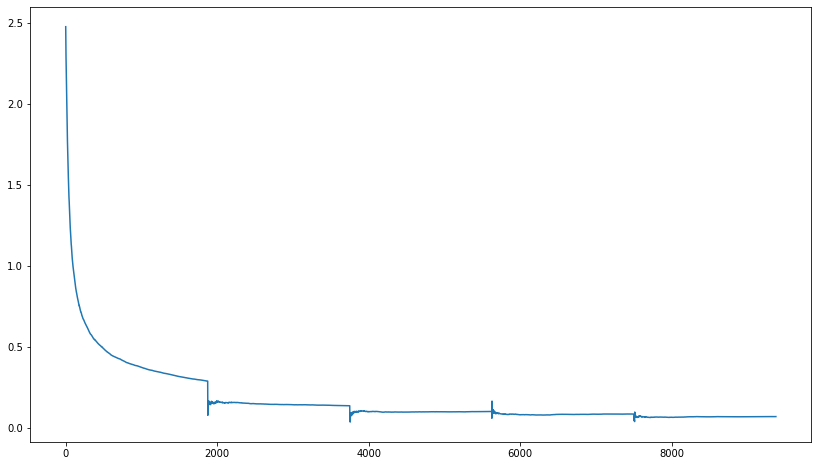

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
print(df.head())
plt.plot(df.metrics)